<a href="https://colab.research.google.com/github/jigsawcoder/Automated-Machine-Learning-Tools/blob/master/MLBox_framingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#pip install mlbox

In [1]:
import mlbox
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_path = "/content/drive/My Drive/framingham_train.csv"  # To be modified
test_path = "/content/drive/My Drive/framingham_test.csv"    # To be modified


In [3]:
paths = [train_path, test_path]
target_name = 'TenYearCHD'       # To be modified

In [4]:
data = Reader(sep=",").train_test_split(paths,target_name)


reading csv : framingham_train.csv ...
cleaning data ...
CPU time: 5.308409690856934 seconds

reading csv : framingham_test.csv ...
cleaning data ...
CPU time: 0.4020266532897949 seconds

> Number of common features : 15

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 0
> Number of numerical features: 15
> Number of training samples : 3392
> Number of test samples : 848

> Top sparse features (% missing values on train set):
glucose       9.0
education     2.4
BPMeds        1.4
totChol       1.0
cigsPerDay    0.5
dtype: float64

> Task : classification
0.0    2886
1.0     506
Name: TenYearCHD, dtype: int64

encoding target ...


In [5]:
# Removing the Drifting Variables
dft=Drift_thresholder()
data=dft.fit_transform(data)


computing drifts ...
CPU time: 0.4172232151031494 seconds

> Top 10 drifts

('currentSmoker', 0.04716981132075482)
('totChol', 0.04236174461552156)
('glucose', 0.03971678644535426)
('sysBP', 0.027320804779281005)
('education', 0.02670545567817717)
('male', 0.024764150943396235)
('prevalentHyp', 0.016804245283018826)
('BMI', 0.015622218761125017)
('cigsPerDay', 0.010538114097543572)
('heartRate', 0.007770781416874373)

> Deleted variables : []
> Drift coefficients dumped into directory : save


## The heavy lifting : optimizing

In [6]:
# Setting up optimiser object
opt = Optimiser(scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [15]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
score1 = opt.evaluate(None, data)


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = 0.8387382075471698
VARIANCE : 0.006191037735849059 (fold 1 = 0.8325471698113207, fold 2 = 0.8449292452830188)
CPU time: 1.26033616065979 seconds



## Creating your own search space and evalluate the model using that search space.


In [9]:

# Lets create space of multiple configurations:
space = {
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0, "mean"]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding", "random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.001, 0.2]}, 
        'est__strategy':{"search":"choice", 
                         "space":["RandomForest", "ExtraTrees", "LightGBM"]},
        'est__max_depth':{"search":"choice", 
                          "space":[8, 9, 10, 11, 12, 13]}
        }




In [10]:
best = opt.optimise(space, data)       
# It returns the best hyperparameters out of all the parameters in the search space 


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.13470044570724182}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 12, 'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : accuracy = 0.8493514150943396
VARIANCE : 0.0002948113207547065 (fold 1 = 0.8490566037735849, fold 2 = 0.8496462264150944)
CPU time: 4.121508836746216 seconds
###################################


> No parameters set. Default configuration is tested

fitting the pipeline ...
CPU time: 0.6916525363922119 seconds


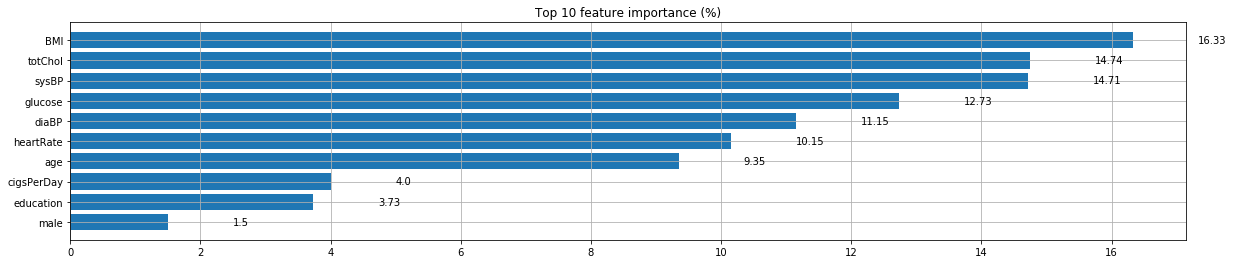


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.04675173759460449 seconds

> Overview on predictions : 

        0.0       1.0  TenYearCHD_predicted
0  0.870157  0.129843                     0
1  0.950265  0.049735                     0
2  0.872621  0.127379                     0
3  0.975997  0.024003                     0
4  0.894923  0.105077                     0
5  0.990221  0.009779                     0
6  0.998806  0.001194                     0
7  0.838588  0.161412                     0
8  0.998806  0.001194                     0
9  0.999745  0.000255                     0

dumping predictions into directory : save ...


In [12]:
pred = Predictor()
pred.fit_predict(None, data)


fitting the pipeline ...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU time: 1.5831475257873535 seconds


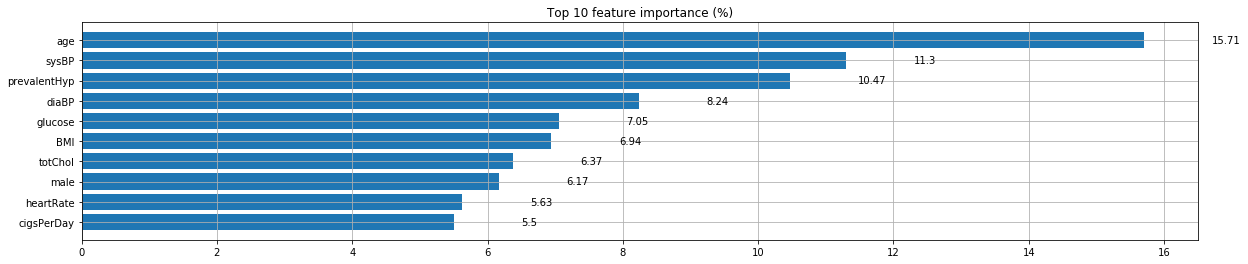


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.21946430206298828 seconds

> Overview on predictions : 

        0.0       1.0  TenYearCHD_predicted
0  0.931392  0.068608                     0
1  0.885352  0.114648                     0
2  0.773353  0.226647                     0
3  0.891943  0.108057                     0
4  0.759958  0.240042                     0
5  0.904989  0.095011                     0
6  0.909048  0.090952                     0
7  0.906204  0.093796                     0
8  0.945771  0.054229                     0
9  0.948847  0.051153                     0

dumping predictions into directory : save ...


In [13]:
pred.fit_predict(best, data)